<a href="https://colab.research.google.com/github/snfruby/CS114.K21/blob/master/Round2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
import pandas as pd
import numpy as np

In [0]:
data = pd.read_csv('http://cs.uit.edu.vn/data2.txt', names = ['size', 'time'])
data.head()
print(data.shape)

(71115, 2)


Lấy dữ liệu xuống bằng cách import thư viện pandas để đọc data dạng URL


In [0]:
from sklearn.model_selection import train_test_split
X=data['size']
y=data['time']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)
X_train = X_train.values.reshape(-1,1)
X_valid = X_valid.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_valid = y_valid.values.reshape(-1,1)
print(X_train.shape, y_train.shape)

(56892, 1) (56892, 1)


phân tách bảng để lấy các features cần cho dự đoán

phân chia dữ liệu train và valid với tỉ lệ 8/2

reshape lại dữ liệu vì lúc này dữ liệu đang ở dạng array 1 chiều

In [0]:
from sklearn.metrics import mean_absolute_error
models =[]
models.append(('LR', LinearRegression()))
r={}
for name, model in models:
  model.fit(X_train, y_train)
  val_pre = model.predict(X_valid)
  val_mae = mean_absolute_error(val_pre, y_valid)
  r[name]=val_mae
  print(name,":",val_mae)

LR : 0.00831551754510758


Khảo sát với thuật toán Linear regression và kiểm tra model bằng sai số tuyệt đối ( mean absolute error )

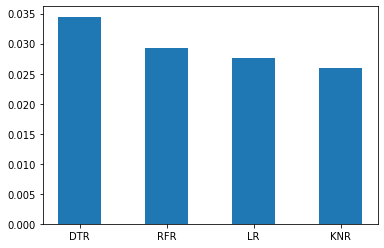

In [0]:
from matplotlib import pyplot
pyplot.bar(r.keys(), r.values(), width=0.5)
pyplot.show()

In [0]:
LR_model = LinearRegression()
LR_model.fit(X_train , y_train)
val_pred_1 = LR_model.predict(X_valid)
print (mean_absolute_error(val_pred_1 , y_valid))
new_data = {'input size':[5839301] }
data_convert_2=pd.DataFrame.from_dict(new_data) 
print (LR_model.predict(data_convert_2))

0.00831551754510758
[[0.47783484]]


Tạo 1 biến dữ liệu mới đưa vào model để train và thực hiện dự đoán